<a href="https://colab.research.google.com/github/VeraMendes/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Vera_Mendes_DS8_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 0 - Revert your version of Pandas right from the start
I don't want any of you to get stuck because of Pandas bugs, so right from the get-go revert back to version `0.23.4`
- Run the cell below
- Then restart your runtime. Go to `Runtime`  ->  `Restart runtime...` in the top menu (or click the "RESTART RUNTIME" button that shows up in the output of the cell below).


In [1]:
!pip install pandas==0.23.4

     |████████████████████████████████| 8.9MB 5.1MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.23.4 which is incompatible.
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2


## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
# import pandas
import pandas as pd

In [13]:
# import archive
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data

--2019-09-06 15:38:06--  http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3103 (3.0K) [application/x-httpd-php]
Saving to: ‘haberman.data.1’

haberman.data.1     100%[===================>]   3.03K  --.-KB/s    in 0s      

2019-09-06 15:38:06 (270 MB/s) - ‘haberman.data.1’ saved [3103/3103]



In [14]:
!head haberman.data

30,64,1,1
30,62,3,1
30,65,0,1
31,59,2,1
31,65,4,1
33,58,10,1
33,60,0,1
34,59,0,2
34,66,9,2
34,58,30,1


In [15]:
!tail haberman.data

72,67,3,1
73,62,0,1
73,68,0,1
74,65,3,2
74,63,0,1
75,62,1,1
76,67,0,1
77,65,3,1
78,65,1,2
83,58,2,2


In [0]:
#  creating column headers
column_headers = ['Age_of_patient_time_of_operation', 'Patient_year_of_operation', 'Number_positive_axillary_nodes_detected', 'Survival_status']

In [73]:
# looking at the data
df = pd.read_csv('haberman.data', names=column_headers)
print(df.shape)
df.head(10)

(306, 4)


,Age_of_patient_time_of_operation,Patient_year_of_operation,Number_positive_axillary_nodes_detected,Survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [7]:
# checking for NaN values
df. isnull(). sum()

Age_of_patient_time_of_operation           0
Patient_year_of_operation                  0
Number_positive_axillary_nodes_detected    0
Survival_status                            0
dtype: int64

In [0]:
# define a function to change values on 'Survival_Status' column

def binary(number):
  if number == 2:
    return 0
  else:
    return 1

# testing function
# a = 2
# b = 1
# binary(a)
# binary(b)


In [74]:
# applying function to my df

df['Survival_status'] = df['Survival_status']. apply(binary)
df.head(10)

,Age_of_patient_time_of_operation,Patient_year_of_operation,Number_positive_axillary_nodes_detected,Survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,0
8,34,66,9,0
9,34,58,30,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [22]:
#  looking for limits
df.describe()

,Age_of_patient_time_of_operation,Patient_year_of_operation,Number_positive_axillary_nodes_detected,Survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [0]:
age_bins = pd.cut(df['Age_of_patient_time_of_operation'], 3)
operation_year_bins = pd.cut(df['Patient_year_of_operation'], 2)
nodes_detected_bins = pd.cut(df['Number_positive_axillary_nodes_detected'], 3)

In [26]:
# looking for relationships

crosstab = pd.crosstab(nodes_detected_bins, df['Survival_status'])
crosstab

Survival_status,0,1
Number_positive_axillary_nodes_detected,,
"(-0.052, 17.333]",70,216
"(17.333, 34.667]",9,8
"(34.667, 52.0]",2,1


In [27]:
crosstab = pd.crosstab([nodes_detected_bins,operation_year_bins], df['Survival_status'], normalize='columns')
crosstab

Survival_status                                                           0         1
Number_positive_axillary_nodes_detected Patient_year_of_operation                    
(-0.052, 17.333]                        (57.989, 63.5]             0.444444  0.542222
                                        (63.5, 69.0]               0.419753  0.417778
(17.333, 34.667]                        (57.989, 63.5]             0.061728  0.022222
                                        (63.5, 69.0]               0.049383  0.013333
(34.667, 52.0]                          (57.989, 63.5]             0.024691  0.000000
                                        (63.5, 69.0]               0.000000  0.004444

In [28]:
crosstab = pd.crosstab(nodes_detected_bins,operation_year_bins)
crosstab

Patient_year_of_operation,"(57.989, 63.5]","(63.5, 69.0]"
Number_positive_axillary_nodes_detected,,
"(-0.052, 17.333]",158,128
"(17.333, 34.667]",10,7
"(34.667, 52.0]",2,1


In [29]:
crosstab = pd.crosstab(age_bins, nodes_detected_bins)
crosstab

Number_positive_axillary_nodes_detected,"(-0.052, 17.333]","(17.333, 34.667]","(34.667, 52.0]"
Age_of_patient_time_of_operation,,,
"(29.947, 47.667]",99,7,1
"(47.667, 65.333]",149,10,2
"(65.333, 83.0]",38,0,0


In [31]:
crosstab_new = pd.crosstab([nodes_detected_bins,age_bins], df['Survival_status'], normalize='columns')
crosstab_new

Survival_status                                                                  0         1
Number_positive_axillary_nodes_detected Age_of_patient_time_of_operation                    
(-0.052, 17.333]                        (29.947, 47.667]                  0.246914  0.351111
                                        (47.667, 65.333]                  0.481481  0.488889
                                        (65.333, 83.0]                    0.135802  0.120000
(17.333, 34.667]                        (29.947, 47.667]                  0.061728  0.008889
                                        (47.667, 65.333]                  0.049383  0.026667
(34.667, 52.0]                          (29.947, 47.667]                  0.012346  0.000000
                                        (47.667, 65.333]                  0.012346  0.004444

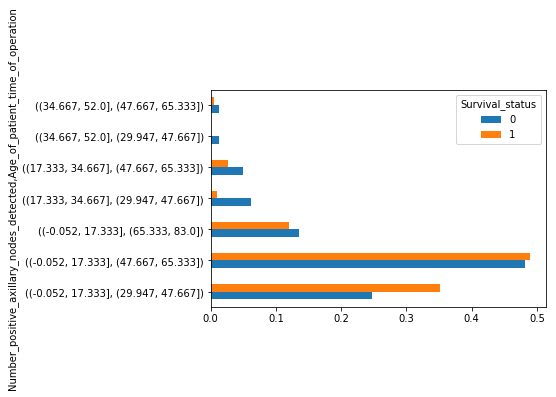

In [32]:
crosstab_new.plot(kind='barh');

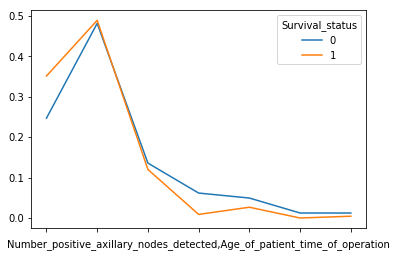

In [33]:
crosstab_new.plot();

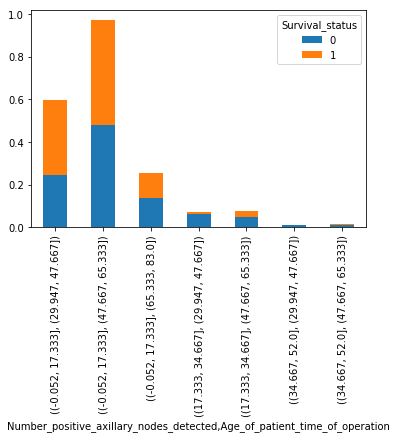

In [34]:
crosstab_new.plot(kind='bar', stacked=True, );

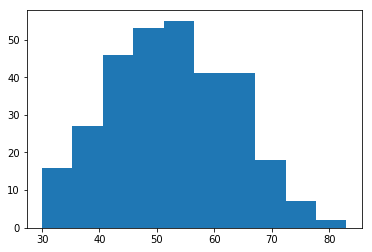

In [36]:
import matplotlib.pyplot as plt
histogram_age=plt.hist(df.Age_of_patient_time_of_operation)

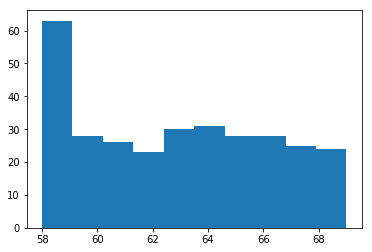

In [90]:
histogram_year=plt.hist(df.Patient_year_of_operation)

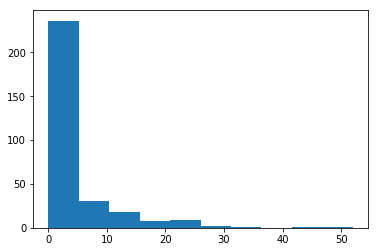

In [91]:
histogram_nodes=plt.hist(df.Number_positive_axillary_nodes_detected)

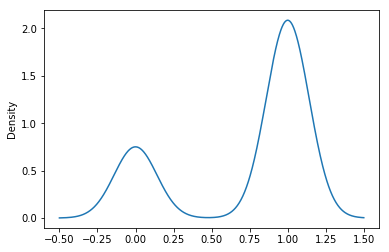

In [38]:
df['Survival_status'].plot.density();

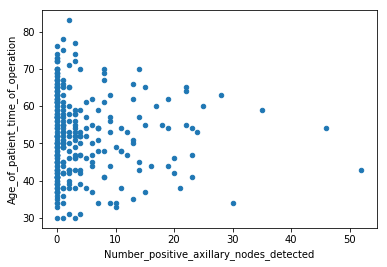

In [40]:
df.plot.scatter('Number_positive_axillary_nodes_detected','Age_of_patient_time_of_operation' );

In [0]:
# smaller bins for detected nodes and patient year of operation as per differences of numbers in each histogram
nodes_detected_bins2 = pd.cut(df['Number_positive_axillary_nodes_detected'], 25)
operation_year_bins2 = pd.cut(df['Patient_year_of_operation'], 5)
age_bins2 = pd.cut(df['Age_of_patient_time_of_operation'], 10)

In [0]:
# generally by the data:
# the age of the patient on the time of operation and the nodes detected after will affect directly the survival status
# the year of operation does not seem as relevant for this data
# though you can tell that people who had operation later has a relatively better survival rate but, it is not substantial
# younger people has more probability of survival status
# detection of nodes affects dramatically the survival status
# patients with more than 34 positive axillary nodes detected don't seem to survive at all when they are older than 65
# older patients might die even before they reached the 34 positive axillary nodes 
# more patients were operated around 58
# not many patients have more than 5 nodes, but maybe they die as soon as they start getting more than that.

## Part 3 - DataFrame Filtering

Use DataFrame filtering to subset the data into two smaller dataframes. You should make one dataframe for individuals who survived >5 years and a second dataframe for individuals who did not. 

Create a graph with each of the dataframes (can be the same graph type) to show the differences in Age and Number of Positive Axillary Nodes Detected between the two groups.

In [77]:
# patients who survived 5 years or longer

df_survival_5_or_more_years = df[df['Survival_status'] > 0]
df_survival_5_or_more_years.head(10)

,Age_of_patient_time_of_operation,Patient_year_of_operation,Number_positive_axillary_nodes_detected,Survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
9,34,58,30,1
10,34,60,1,1
11,34,61,10,1


In [78]:
print(df_survival_5_or_more_years.shape)

(225, 4)


In [82]:
# individuals who die within the first 5 years

df_died_within_5_years = df[df['Survival_status'] <= 0]

df_died_within_5_years.head(10)

,Age_of_patient_time_of_operation,Patient_year_of_operation,Number_positive_axillary_nodes_detected,Survival_status
7,34,59,0,0
8,34,66,9,0
24,38,69,21,0
34,39,66,0,0
43,41,60,23,0
44,41,64,0,0
45,41,67,0,0
53,42,69,1,0
54,42,59,0,0
62,43,58,52,0


In [83]:
print(df_died_within_5_years.shape)

(81, 4)


In [0]:
# smaller bins for detected nodes and patient year of operation as per differences of numbers in each histogram
nodes_detected_bins3 = pd.cut(df_survival_5_or_more_years['Number_positive_axillary_nodes_detected'], 25)
operation_year_bins3 = pd.cut(df_survival_5_or_more_years['Patient_year_of_operation'], 5)
age_bins3 = pd.cut(df_survival_5_or_more_years['Age_of_patient_time_of_operation'], 10)

In [0]:
# smaller bins for detected nodes and patient year of operation as per differences of numbers in each histogram
nodes_detected_bins4 = pd.cut(df_died_within_5_years['Number_positive_axillary_nodes_detected'], 25)
operation_year_bins4 = pd.cut(df_died_within_5_years['Patient_year_of_operation'], 5)
age_bins4 = pd.cut(df_died_within_5_years['Age_of_patient_time_of_operation'], 10)

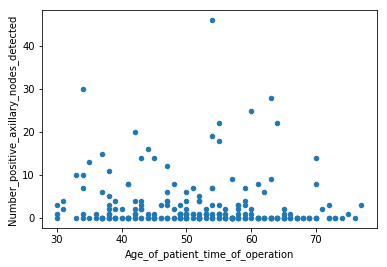

In [84]:
df_survival_5_or_more_years.plot.scatter('Age_of_patient_time_of_operation', 'Number_positive_axillary_nodes_detected');

In [104]:
crosstab_1 = pd.crosstab(age_bins2, nodes_detected_bins2)
crosstab_1

Number_positive_axillary_nodes_detected,"(-0.052, 2.08]","(2.08, 4.16]","(4.16, 6.24]","(6.24, 8.32]","(8.32, 10.4]","(10.4, 12.48]","(12.48, 14.56]","(14.56, 16.64]","(16.64, 18.72]","(18.72, 20.8]","(20.8, 22.88]","(22.88, 24.96]","(24.96, 27.04]","(27.04, 29.12]","(29.12, 31.2]","(33.28, 35.36]","(45.76, 47.84]","(49.92, 52.0]"
Age_of_patient_time_of_operation,,,,,,,,,,,,,,,,,,
"(29.947, 35.3]",8,2,0,1,3,0,1,0,0,0,0,0,0,0,1,0,0,0
"(35.3, 40.6]",20,2,2,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0
"(40.6, 45.9]",31,3,2,2,1,0,2,1,0,2,0,1,0,0,0,0,0,1
"(45.9, 51.2]",31,8,3,3,1,3,2,0,0,1,0,1,0,0,0,0,0,0
"(51.2, 56.5]",28,10,3,3,2,2,0,1,1,1,1,2,0,0,0,0,1,0
"(56.5, 61.8]",28,4,2,2,1,0,1,0,1,0,0,0,1,0,0,1,0,0
"(61.8, 67.1]",31,0,1,1,1,0,2,1,0,1,2,0,0,1,0,0,0,0
"(67.1, 72.4]",13,2,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0
"(72.4, 77.7]",5,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


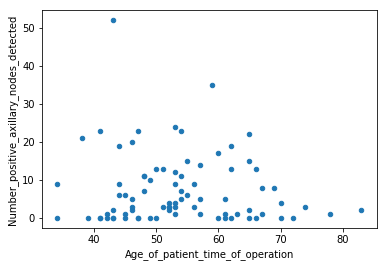

In [85]:
df_died_within_5_years.plot.scatter('Age_of_patient_time_of_operation', 'Number_positive_axillary_nodes_detected');

In [87]:
df_survival_5_or_more_years.Patient_year_of_operation.mean()

62.86222222222222

In [86]:
df_died_within_5_years.Patient_year_of_operation.mean()

62.82716049382716

In [88]:
df_survival_5_or_more_years.describe()

,Age_of_patient_time_of_operation,Patient_year_of_operation,Number_positive_axillary_nodes_detected,Survival_status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [89]:
df_died_within_5_years.describe()

,Age_of_patient_time_of_operation,Patient_year_of_operation,Number_positive_axillary_nodes_detected,Survival_status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,0.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,0.0
25%,46.000000,59.000000,1.000000,0.0
50%,53.000000,63.000000,4.000000,0.0
75%,61.000000,65.000000,11.000000,0.0
max,83.000000,69.000000,52.000000,0.0


## Part 4 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival? (As that feature goes up in value rate of survival increases)
- What is at least one feature that looks to have a negative relationship with survival? (As that feature goes down in value rate of survival increases)
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

Your Text Answer Here

In [107]:
crosstab_example1 = pd.crosstab(age_bins2, df['Survival_status'])
crosstab_example1

Survival_status,0,1
Age_of_patient_time_of_operation,,
"(29.947, 35.3]",2,14
"(35.3, 40.6]",2,25
"(40.6, 45.9]",15,31
"(45.9, 51.2]",16,37
"(51.2, 56.5]",18,37
"(56.5, 61.8]",9,32
"(61.8, 67.1]",12,29
"(67.1, 72.4]",4,14
"(72.4, 77.7]",1,6


In [101]:
crosstab_example2 = pd.crosstab(operation_year_bins2, df['Survival_status'])
crosstab_example2

Survival_status,0,1
Patient_year_of_operation,,
"(57.989, 60.2]",25,66
"(60.2, 62.4]",10,39
"(62.4, 64.6]",16,45
"(64.6, 66.8]",19,37
"(66.8, 69.0]",11,38


In [98]:
crosstab_example3 = pd.crosstab(nodes_detected_bins2, df['Survival_status'])
crosstab_example3

Survival_status,0,1
Number_positive_axillary_nodes_detected,,
"(-0.052, 2.08]",32,165
"(2.08, 4.16]",10,23
"(4.16, 6.24]",7,6
"(6.24, 8.32]",4,10
"(8.32, 10.4]",5,4
"(10.4, 12.48]",4,2
"(12.48, 14.56]",5,4
"(14.56, 16.64]",2,2
"(16.64, 18.72]",1,1


In [0]:
#  1. Feature that goes up in rate when survival increases is Patient_year_of_operation.

In [0]:
#  2. Feature that goes down in rate when survival increases is Number_positive_axillary_nodes_detected.

In [0]:
#  3. It seems that as earlier as the patient goes for operation, less is the probability of this patient having axillary nodes detected.